In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv("archive/train.csv")

In [4]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
# Target and features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [6]:
df['Category'].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

<Axes: xlabel='Category', ylabel='count'>

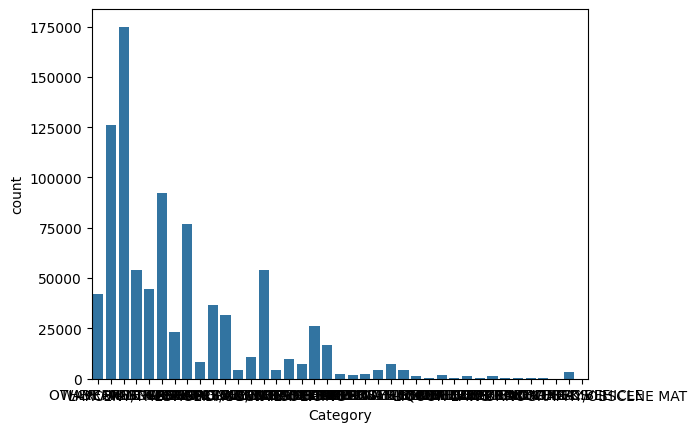

In [ ]:
sns.countplot(x='Category', data=df)

In [ ]:
# Engineer time-based features from 'Dates' and drop unnecessary columns.

df['Dates'] = pd.to_datetime(df['Dates'])
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour
df['DayOfWeek'] = df['Dates'].dt.dayofweek

df = df.drop(columns=['Dates', 'Descript', 'Resolution'], axis=1)

df.head()

,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour
0,WARRANTS,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,OTHER OFFENSES,2,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,OTHER OFFENSES,2,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,LARCENY/THEFT,2,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23
4,LARCENY/THEFT,2,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23


In [9]:
# Target and features
y = df['Category']
X = df.drop(columns=['Category', 'Address'], axis=1)

In [ ]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [12]:
X.head()

,DayOfWeek,X,Y,Year,Month,Day,Hour,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2,-122.425892,37.774599,2015,5,13,23,False,False,False,True,False,False,False,False,False
1,2,-122.425892,37.774599,2015,5,13,23,False,False,False,True,False,False,False,False,False
2,2,-122.424363,37.800414,2015,5,13,23,False,False,False,True,False,False,False,False,False
3,2,-122.426995,37.800873,2015,5,13,23,False,False,False,True,False,False,False,False,False
4,2,-122.438738,37.771541,2015,5,13,23,False,False,False,False,True,False,False,False,False


In [ ]:
# Test and train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

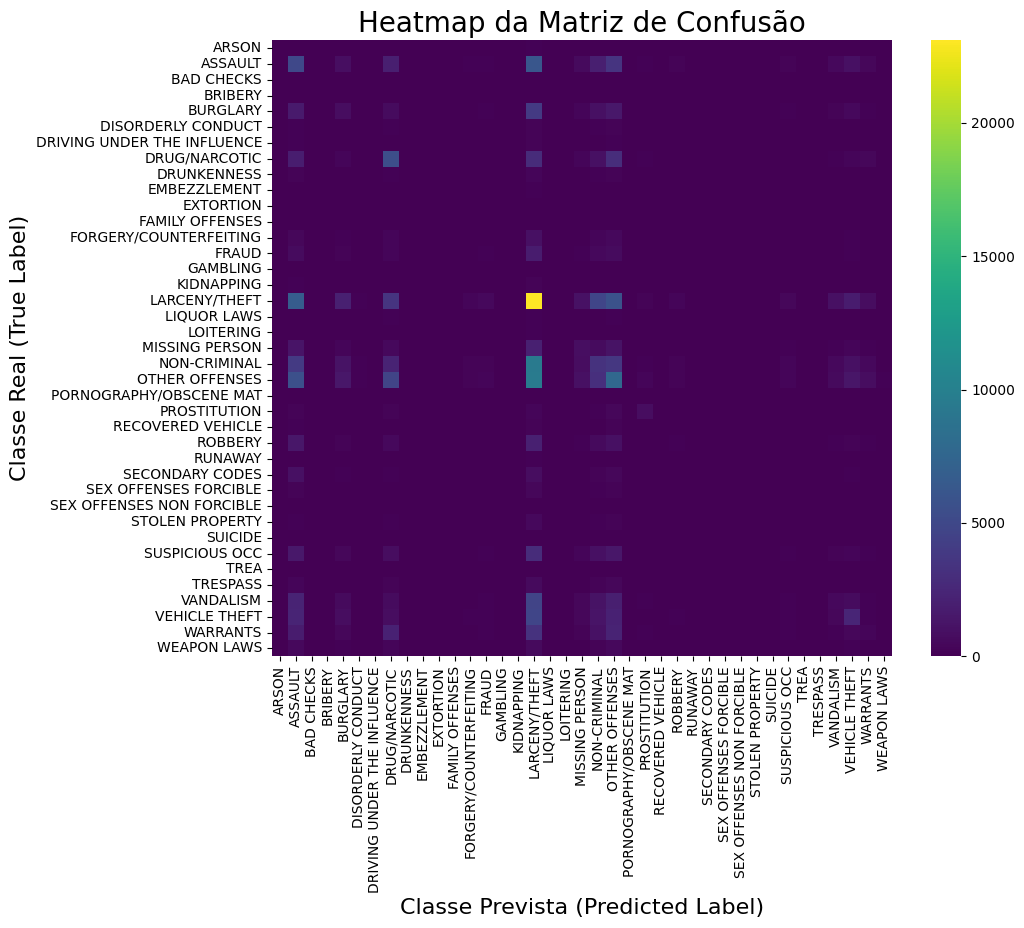

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))


class_names = sorted(y.unique())
sns.heatmap(cm, 
            annot=False,
            cmap='viridis',
            xticklabels=class_names, 
            yticklabels=class_names)

plt.title('Heatmap da Matriz de Confusão', fontsize=20)
plt.ylabel('Classe Real (True Label)', fontsize=16)
plt.xlabel('Classe Prevista (Predicted Label)', fontsize=16)
plt.show()